<h1 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
Brief explanation on our Booter database analysis methodology: <br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h1> 

# Analysis of: stealthstresser
#### File originally retrieved from: http://4lz5rmnkd6f63tmm.onion/db/stealth_stresser.sql

## * Libraries that I use to analyse data

In [3]:
import pandas as pd
import numpy as np

from io import StringIO
import re

from IPython.display import display,clear_output

<h1 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 0: Reading an input Booter database file<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h1> 

In [4]:
dumpfile='stealth_stresser.sql'

<h1 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 1: Adaptation to our Booter database schema<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h1> 

## 1. Reading the first 'N' (100) lines of the input Booter database file

In [5]:
lines_to_read=100

with open(dumpfile) as myfile:
    firstlines=myfile.readlines()[0:lines_to_read] #put here the interval you want
    for x in firstlines:
        print(x.strip())

-- phpMyAdmin SQL Dump
-- version 4.0.8
-- http://www.phpmyadmin.net
--
-- Host: localhost
-- Generation Time: Feb 26, 2014 at 04:04 AM
-- Server version: 5.5.32-cll-lve
-- PHP Version: 5.3.17

SET SQL_MODE = "NO_AUTO_VALUE_ON_ZERO";
SET time_zone = "+00:00";


/*!40101 SET @OLD_CHARACTER_SET_CLIENT=@@CHARACTER_SET_CLIENT */;
/*!40101 SET @OLD_CHARACTER_SET_RESULTS=@@CHARACTER_SET_RESULTS */;
/*!40101 SET @OLD_COLLATION_CONNECTION=@@COLLATION_CONNECTION */;
/*!40101 SET NAMES utf8 */;

--
-- Database: `steaafnq_lol1234`
--

-- --------------------------------------------------------

--
-- Table structure for table `api`
--

CREATE TABLE IF NOT EXISTS `api` (
`id` int(11) NOT NULL AUTO_INCREMENT,
`api` varchar(1024) NOT NULL,
PRIMARY KEY (`id`)
) ENGINE=MyISAM  DEFAULT CHARSET=latin1 AUTO_INCREMENT=47 ;

--
-- Dumping data for table `api`
--

INSERT INTO `api` (`id`, `api`) VALUES
(45, 'http://api.hfempire.net/api/avid.php?key=8837265541&host=[host]&port=[port]&time=[time]&method=[meth

## 2. Listing tables that have content inserted into the dump file

In [6]:
def list_tables_with_insert(dumpfile):
    tables = []
    with open(dumpfile, 'rb') as f:
        for line in f:
            line = line.decode("utf-8").strip()
            if line.lower().startswith('insert'):
                table = re.findall(r'`(.*?)`', line)
                tables.append(table[0])
    return tables

In [7]:
tables=enumerate(list_tables_with_insert(dumpfile))

for i, item in tables:
    print(i+1,item)

1 api
2 blacklist
3 gateway
4 iplogs
5 loginlogs
6 logs
7 messages
8 news
9 plans
10 tickets
11 users


## How the list above looks like? 

<h2 align='center'>======================================================================
If NOT well-formed SQL dump file then you must first do the following:
======================================================================</h2>

## 3. Removing lines that are not part of the actual content to be analysed

## 4. Splitting and naming tables and columns

<h2 align='center'>======================================================================
Additional functions
======================================================================</h2>

## * Function to read tables from wel-formed SQL database dump

In [8]:
# For well formed SQL database dumps!
def read_inserted_table(dumpfile, target_table):
    sio = StringIO()
    fast_forward = True
    with open(dumpfile, 'rb') as f:
        for line in f:
            line = line.decode("utf-8").strip()
            line = re.sub("(?!(([^']*'){2})*[^']*$)\)", '',line) #Step0:remove any ")" from the content of columns
            if line.lower().startswith('insert') and target_table in line:
                fast_forward = False
            if fast_forward:
                continue
            data = re.findall('\([^\)]*\)', line) #Step1: get the content between parentesis (i.e., insert line)
            try:
                newline = data[0].strip('()') #Step2:remove parenthesis
                newline=newline.replace('`','') #Step3: remove ` (usually in table names)
                newline=re.sub(r'(?!(([^\']*\'){2})*[^\']*$),', '', newline) #Step4: remove commas from the content of columns
                newline=newline.replace('\'','') #Step5: remove single quotes
                newline=newline.replace(', ', ',') #Step6: remove single spaces after comma (i.e., in the beginning of a column)
                sio.write(newline)
                sio.write("\n")
            except IndexError:
                pass
            if line.endswith(';'):
                break
    sio.seek(0)
    return sio

## * Converter functions for formatting content of columns

In [9]:
def tolowercase(text):
    try:
        return text.lower()
    except AttributeError:
        return text 

In [10]:
def strip_singlequote(text):
    try:
        return text.strip('\'')
    except AttributeError:
        return text

In [11]:
def timestamp2datetime(timestamp):
    try:
        return  pd.to_datetime(timestamp,unit='s')
    except AttributeError:
        return timestamp 

In [12]:
def dateformat2datetime(text):
    try:
        return  pd.to_datetime(text,format='%d-%m-%Y %H:%M')
    except AttributeError:
        return text 

In [13]:
def strip_singlequote_and_tolowercase(text):
    try:
        return text.strip('\'').lower()
    except AttributeError:
        return text 

In [14]:
def strip_singlequote_and_dateformat2datetime(text):
    try:
        return  pd.to_datetime(text.strip('\''),format='%d-%m-%Y %H:%M')
    except AttributeError:
        return text 

In [15]:
def strip_parenthesisandsemicolon(text):
    try:
        return text.replace(');',"")
    except AttributeError:
        return text 

In [16]:
def strip_insertintologs(text):
    try:
        return int(text.replace('INSERT INTO `logs` VALUES (',""))
    except AttributeError:
        return text 

<h2 align='center'>======================================================================
Adapting EACH existing table
======================================================================</h2>

## 6.1. Table: 'api'

### How this table looks like without modification?

In [18]:
tablename='api'

# Only displaying the results
pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,id,api
0,45,http://api.hfempire.net/api/avid.php?key=88372...
1,46,http://battleapi.info/send.php?key=Knocky&host...


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
   
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o 
    - Split columns:
        o 
    - Add required columns:
        o         

## 6.2. Table: 'blacklist'

### How this table looks like without modification?

In [19]:
tablename='blacklist'

# Only displaying the results
pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,IP
0,2,NaN


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: blacklist
   
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o ID => id
        o IP => ip
    - Split columns:
        o 
    - Add required columns:
        o note       

### Modifying table: 'blacklist'

In [20]:
df_blacklist = pd.read_csv(read_inserted_table(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False,)
#                        converters = {'date':timestamp2datetime})

###Changing names of columns
df_blacklist.rename(columns = {'ID': 'id',
                               'IP': 'ip'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_blacklist['note'] = ""

###Showing some lines after adapt the table
df_blacklist.head(10)

,id,ip,note
0,2,NaN,


## 6.3. Table: 'gateway'

### How this table looks like without modification?

In [21]:
tablename='gateway'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,email
0,separk6112@inha.ac.kr
1,separk6112@inha.ac.kr


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: gateways   
#### Q3: Are there modifications required? 
    - On the table name: 
        o gateway => gateways
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'gateways'

In [22]:
### Loading the column converting columns with predefined functions
df_gateways = pd.read_csv(read_inserted_table(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False,)

df_gateways.head(10)

,email
0,separk6112@inha.ac.kr
1,separk6112@inha.ac.kr


## 6.4 Table: 'iplogs'

### How this table looks like without modification?

In [23]:
tablename='iplogs'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,userID,logged,date
0,3,34,66.249.85.234,1393381548


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: logins    
#### Q3: Are there modifications required? 
    - On the table name: 
        o iplogs => logins
    - On the column type: 
        o date => timestamp2date 
    - On the column name:
        o ID => id
        o userID => userid
        o logged => userip
    - Add required columns:
        o username
    - Split columns:
        o 

### Modifying table: 'iplogins'

In [24]:
### Loading the column converting columns with predefined functions
df_logins = pd.read_csv(read_inserted_table(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False,
                       converters = {'date':timestamp2datetime})

###Changing names of columns
df_logins.rename(columns = {'ID': 'id',
                                    'userID': 'userid',
                           'logged':'userip'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_logins['username'] = ""

###Showing some lines after adapt the table
df_logins.head(10)

,id,userid,userip,date,username
0,3,34,66.249.85.234,2014-02-26 02:25:48,


## 6.5. Table: 'loginlogs'

### How this table looks like without modification?

In [25]:
tablename='loginlogs'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,username,ip,date,country
0,MrDONFGROTTI,76.126.50.150,1391932547,NaN
1,MrDonSGrotti,76.126.50.150,1391932952,NaN
2,imthegodfather9,166.134.13.198,1391933017,NaN
3,MrDonSGrotti,76.126.50.150,1391933892,NaN
4,Adrian,213.128.167.70,1391942610,NaN
5,huyuy5tt67,93.84.189.169,1391960462,NaN
6,CZESIOpl,83.11.238.235,1391962754,NaN
7,KnockSteady,70.211.1.154,1391966844,NaN
8,MrDonSGrotti,76.126.50.150,1391970734,NaN
9,Yanis92i,41.103.190.120,1391981137,NaN


#### Q1: Is this table different from other previous loaded table? YES BUT must to APPEND to logins
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: logins
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o loginlogs => logins_temporary
    - On the column type: 
        o date => timestamp2datetime() 
    - On the column name:
        o ip => userip
    - Add required columns:
        o id
        o userid
    - Split columns:
        o 

### Modifying table: 'loginlogs'

In [26]:
### Loading the column converting columns with predefined functions
df_logins_temporary = pd.read_csv(read_inserted_table(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False,
                       converters = {'date':timestamp2datetime})

###Changing names of columns
df_logins_temporary.rename(columns = {'ip': 'userip'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_logins_temporary['id'] = ""
df_logins_temporary['userid'] = ""

###Showing some lines after adapt the table
df_logins_temporary.head(10)

,username,userip,date,country,id,userid
0,MrDONFGROTTI,76.126.50.150,2014-02-09 07:55:47,NaN,,
1,MrDonSGrotti,76.126.50.150,2014-02-09 08:02:32,NaN,,
2,imthegodfather9,166.134.13.198,2014-02-09 08:03:37,NaN,,
3,MrDonSGrotti,76.126.50.150,2014-02-09 08:18:12,NaN,,
4,Adrian,213.128.167.70,2014-02-09 10:43:30,NaN,,
5,huyuy5tt67,93.84.189.169,2014-02-09 15:41:02,NaN,,
6,CZESIOpl,83.11.238.235,2014-02-09 16:19:14,NaN,,
7,KnockSteady,70.211.1.154,2014-02-09 17:27:24,NaN,,
8,MrDonSGrotti,76.126.50.150,2014-02-09 18:32:14,NaN,,
9,Yanis92i,41.103.190.120,2014-02-09 21:25:37,NaN,,


In [27]:
df_logins=df_logins.append(df_logins_temporary)

## 6.6. Table: 'logs'

### How this table looks like without modification?

In [28]:
tablename='logs'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,userID,logged,date
0,3,34,66.249.85.234,1393381548


#### Q1: Is this table different from other previous loaded table? YES, APPEND with LOGINS
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: logins
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o logs => logins_temporary
    - On the column type: 
        o date => timestamptodatetime() 
    - On the column name:
        o ID => id
        o userID => userid
        o logged => userip
    - Add required columns:
        o username
    - Split columns:
        o 

### Modifying table: 'logs'

In [29]:
### Loading the column converting columns with predefined functions
df_logins_temporary = pd.read_csv(read_inserted_table(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False,
                       converters = {'date':timestamp2datetime})

###Changing names of columns
df_logins_temporary.rename(columns = {'ID': 'id',
                                     'userID': 'userid',
                                     'logged':'userip'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_logins_temporary['username'] = ""

###Showing some lines after adapt the table
df_logins_temporary.head(10)

,id,userid,userip,date,username
0,3,34,66.249.85.234,2014-02-26 02:25:48,


In [30]:
df_logins=df_logins.append(df_logins_temporary)

## 6.7. Table: 'messages'

### How this table looks like without modification?

In [31]:
tablename='messages'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,messageid,ticketid,content,sender
0,2,2,Hi,Admin
1,3,3,the transaction from paypal,Admin
2,4,6,well if i get enough power i can provide to ge...,Admin
3,5,7,sorry but I would if you had money and I would...,Admin
4,6,9,well i fucked it up trying to setup your plan ...,Admin
5,7,8,yeah i set it up you now have silver,Admin
6,8,9,Can\\t login on reflection22 and on this i don...,Client
7,9,9,Why don\\t I just setup a plan on this account...,Admin
8,10,9,yes please do,Client
9,11,9,k,Admin


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.8. Table: 'news'

### How this table looks like without modification?

In [32]:
tablename='news'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,title,date
0,85,STOP BOOT WORKS NOW,1392782265
1,90,THE AUTO BUY DOESNT WORK SO PLEASE OPEN A TICK...,1392854454


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: 
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.9. Table: 'plans'

### How this table looks like without modification?

In [33]:
tablename='plans'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,name,mbt,unit,length,price,concurrents
0,67,3GBPS 300 Boot Time 1 Day Trail,300,Days,1,2,1
1,68,3GBPS 300 Boot Time 1 Week Trail,300,Weeks,1,5,1
2,69,3GBPS 1200 Boot Time Bronze Monthly,1200,Months,1,10,1
3,70,3GBPS 2400 Boot Time Silver Monthly,2400,Months,1,15,1
4,71,3GBPS 3600 Boot Time Gold Monthly,3600,Months,1,20,1
5,72,3GBPS 2400 Boot Time Silver 3 Months,2400,Months,3,36,2
6,74,3GBPS 7200 Boot Time Platinum 3 Months,7200,Months,3,40,2
7,75,3GBPS 1000 Boot Time Special 3 Months,1000,Months,3,32,2
8,76,3GBPS 2400 Boot Time Silver LifeTime,2400,Years,21,55,3
9,77,3GBPS 1200 Boot Time Bronze LifeTime,1200,Years,21,45,3


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? YES
    - This table looks like: plans
    
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o 
    - On the column name:
        o ID => planid
        o name => plandescr
        o mbt => maxboottime
        o concurrents =>concurrency
    - Add required columns:
        o planname
    - Split columns:
        o 

### Modifying table: 'plans'

In [34]:
### Loading the column converting columns with predefined functions
df_plans = pd.read_csv(read_inserted_table(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False,)
#                        converters = {'date':timestamp2datetime})

###Changing names of columns
df_plans.rename(columns = {'ID': 'planid',
                          'name': 'plandescr',
                          'mbt': 'maxboottime',
                          'concurrents': 'concurrency'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
df_plans['planname'] = ""

###Showing some lines after adapt the table
df_plans.head(10)

,planid,plandescr,maxboottime,unit,length,price,concurrency,planname
0,67,3GBPS 300 Boot Time 1 Day Trail,300,Days,1,2,1,
1,68,3GBPS 300 Boot Time 1 Week Trail,300,Weeks,1,5,1,
2,69,3GBPS 1200 Boot Time Bronze Monthly,1200,Months,1,10,1,
3,70,3GBPS 2400 Boot Time Silver Monthly,2400,Months,1,15,1,
4,71,3GBPS 3600 Boot Time Gold Monthly,3600,Months,1,20,1,
5,72,3GBPS 2400 Boot Time Silver 3 Months,2400,Months,3,36,2,
6,74,3GBPS 7200 Boot Time Platinum 3 Months,7200,Months,3,40,2,
7,75,3GBPS 1000 Boot Time Special 3 Months,1000,Months,3,32,2,
8,76,3GBPS 2400 Boot Time Silver LifeTime,2400,Years,21,55,3,
9,77,3GBPS 1200 Boot Time Bronze LifeTime,1200,Years,21,45,3,


## 6.10. Table: 'tickets'

### How this table looks like without modification?

In [35]:
tablename='tickets'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,id,subject,content,status,username
0,2,htgldjhqnj,nlgsfjdngkdf,Waiting for user response,hanz
1,3,Don\\t Work.,I bought from you the plan but you didn\\t giv...,Waiting for user response,CMblCL
2,4,soomin,ldwlfelelle,Closed,Knock8351
3,5,Purchase Plan,I got the bronze month completed and me still ...,Closed,nerv99
4,6,Trusting,Hi! Due to never being able to trust these new...,Waiting for user response,rtainc
5,7,Stresser,Hey is there any chance there could be like a ...,Waiting for user response,ollied972
6,8,I pruchased a plan,Can you give it to me ?,Waiting for user response,reflection22
7,9,Can\\t log in anymore,I made a second Profile and bought gold i thin...,Waiting for user response,milkakuhhdx


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like:     
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o  
    - Add required columns:
        o 
    - Split columns:
        o 

## 6.13. Read the raw table: 'users'

### How this table looks like without modification?

In [36]:
tablename='users'

pd.read_csv(read_inserted_table(dumpfile, tablename),
            delimiter=",",
            error_bad_lines=False).head(10)

,ID,username,password,email,rank,membership,expire,status
0,22,MrDonSGrotti,ee5e4279150c43f1a2aba62745c91f9c4b857e77,bigboybrandon@att.net,0,78,2054697445,0
1,35,turdboy2582,f39788770ab39c32a1c498559e8e67fb8e4b262a,anthonyvlado16@gmail.com,0,0,0,0
2,145,Gialluisi,ad15a665e02e72d0757cd306e0728d9e1e31cc4b,matheusgialluisi@hotmail.com,0,0,0,0
3,23,imthegodfather9,21e64b7851a2a0e1176384a6239efbb0d14dda1c,nbellinghiere@gmail.com,0,0,0,0
4,24,Adrian,b412a49de8b1621f6784dacbcf2e72a823995e23,adrianfarstad@gmail.com,0,0,0,0
5,25,huyuy5tt67,7b7fe5d397e7d1d43f5208f7cce94221f49e3eac,blokopser@mail.ru,0,0,0,0
6,26,CZESIOpl,6415bb3dbfeb5293f424cc544540b99d199ef550,awpr0z@gmail.com,0,0,0,0
7,27,Yanis92i,9c882a3c6a7238d79e601699060b2ca45766d6e2,yanisafrikano@gmail.com,0,0,0,0
8,28,AsapBoot,78d341a4cc1e36d93f9bb86d871e881bf34952ef,Hamer02140@hotmail.fr,0,0,0,0
9,29,Inferno,5f1184f7df96c5928092ad9c6b550699bf887826,infer!@gmin.com,0,0,0,0


#### Q1: Is this table different from other previous loaded table? YES
#### Q2: Is this table similar to any table in the generic Booter database schema? NO
    - This table looks like: users 
#### Q3: Are there modifications required? 
    - On the table name: 
        o 
    - On the column type: 
        o    
    - On the column name:
        o ID => userid
        o email => useremail
        o membership => planid
    - Add required columns:
        o 
    - Split columns:
        o 

### Modifying table: 'users'

In [37]:
### Loading the column converting columns with predefined functions
df_users = pd.read_csv(read_inserted_table(dumpfile, tablename),
                                delimiter=",",
                                error_bad_lines=False,)
#                        converters = {'date':timestamp2datetime})

###Changing names of columns
df_users.rename(columns = {'ID': 'userid',
                            'email': 'useremail',
                          'membership':'planid'},
                         inplace=True)

###Creating empty columns (with "" [for future string] or np.nan [for future float])
# df_users['generic_column_name_missing'] = ""

###Showing some lines after adapt the table
df_users.head(10)

,userid,username,password,useremail,rank,planid,expire,status
0,22,MrDonSGrotti,ee5e4279150c43f1a2aba62745c91f9c4b857e77,bigboybrandon@att.net,0,78,2054697445,0
1,35,turdboy2582,f39788770ab39c32a1c498559e8e67fb8e4b262a,anthonyvlado16@gmail.com,0,0,0,0
2,145,Gialluisi,ad15a665e02e72d0757cd306e0728d9e1e31cc4b,matheusgialluisi@hotmail.com,0,0,0,0
3,23,imthegodfather9,21e64b7851a2a0e1176384a6239efbb0d14dda1c,nbellinghiere@gmail.com,0,0,0,0
4,24,Adrian,b412a49de8b1621f6784dacbcf2e72a823995e23,adrianfarstad@gmail.com,0,0,0,0
5,25,huyuy5tt67,7b7fe5d397e7d1d43f5208f7cce94221f49e3eac,blokopser@mail.ru,0,0,0,0
6,26,CZESIOpl,6415bb3dbfeb5293f424cc544540b99d199ef550,awpr0z@gmail.com,0,0,0,0
7,27,Yanis92i,9c882a3c6a7238d79e601699060b2ca45766d6e2,yanisafrikano@gmail.com,0,0,0,0
8,28,AsapBoot,78d341a4cc1e36d93f9bb86d871e881bf34952ef,Hamer02140@hotmail.fr,0,0,0,0
9,29,Inferno,5f1184f7df96c5928092ad9c6b550699bf887826,infer!@gmin.com,0,0,0,0


<h2 align='center'>======================================================================
<br>Final step of the manual part
======================================================================</h2>

## 7. Adding missing tables accordingly to our generic Booter database 

In [51]:
# df_users=pd.DataFrame(columns=['userid','username','useremail','password','expire','plan'])      
# df_logins=pd.DataFrame(columns=['id','userid','username','userip','date'])
df_attacks= pd.DataFrame(columns=['id','userid','username','targetip','targeturl','duration','port','type','date'])
# df_payments=pd.DataFrame(columns=['id','userid','username','amountpaid','paymentemail','planid','tid','date'])
df_settings=pd.DataFrame(columns=['url','sitename','siteemail'])
# df_gateways=pd.DataFrame(columns=['email'])
# df_friendsenemies=pd.DataFrame(columns=['id','ip','note','userid','type'])
# df_blacklist=pd.DataFrame(columns=['id','ip','note'])
df_webshells=pd.DataFrame(columns=['id','url','status','lastchecked','attacktype'])
df_servers=pd.DataFrame(columns=['id','ip'])
# df_plans=pd.DataFrame(columns=['planid','planname','plandescr','price','maxboottime','concurrency'])

<h1 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 2: Data Enrichment<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h1> 

### * Depending of the size of the data, this part can take HOURS. I tested for both small and big datasets and it worked. Be pacient. This will pay-off!

## * Libraries needed to retrieve information from external databases

In [52]:
import subprocess
import cfscrape
from lxml import etree
import os.path
import random
import time 

## * Function to enrich IP addresseswith AS information and country 

In [53]:
# THANKS TO: team-cymru.org
def iptoasn(iplist_teamcymruformat_filelocation,outputfile):
    cat = subprocess.Popen(['cat', iplist_teamcymruformat_filelocation], 
                            stdout=subprocess.PIPE)
    
    netcat = subprocess.Popen(['netcat', 'whois.cymru.com', '43'],
                              stdin=cat.stdout,
                              stdout=outputfile)
    time.sleep(3) #for some reason the poll does not work! This was the way to overcome the waiting time.
    
    return netcat.stdout      

## * Function to check if an IP address was Tor node in a given moment

In [54]:
# THANKS TO: exonerator.torproject.org
def WasTorNode(ip, date ):
    url="https://exonerator.torproject.org/?ip="+ip+"&timestamp="+date
    scraper = cfscrape.create_scraper()
    scraped_html=scraper.get(url).content    
    html_tree = etree.HTML(scraped_html)
    result=html_tree.xpath("//h3[@class='panel-title']/text()") # I was looking for <h3 class="panel-title">Result is positive</h3>
    tor_node=True if result == ['Result is positive'] else False
    return tor_node 
# 'date' MUST BE formated as: Year-month-day (2016-03-31)

## * Discovering the middle date of the database

In [55]:
try:
    try:
        middle_date=(min(df_attacks['date'])+((max(df_attacks['date'])-min(df_attacks['date']))/2))
        raise
    except Exception:
        pass

    try:
        middle_date=(min(df_logins['date'])+((max(df_logins['date'])-min(df_logins['date']))/2))
        raise
    except Exception:
        pass

    try:
        middle_date=(min(df_payments['date'])+((max(df_payments['date'])-min(df_payments['date']))/2))
        raise
    except:
        pass
except Exception:
    print("There is no date in the entire dataset")

date_tor_check = middle_date.strftime('%Y-%m-%d')
date_iptoasn_lookup= str(middle_date)
print(date_tor_check)

2013-05-24


## * Preparing to Perform IP to ASN info

In [56]:
df_logins['middledate']=date_iptoasn_lookup
df_attacks['middledate']=date_iptoasn_lookup
df_friendsenemies['middledate']=date_iptoasn_lookup
df_blacklist['middledate']=date_iptoasn_lookup

## 2.1.1  Lookup IP to ASN info of table: logins

In [57]:
if (os.path.exists('enrichments/logins_iptoasn_out')== False):
    logins_iptoasn_in = open('enrichments/logins_iptoasn_in', 'w+')
    logins_iptoasn_in.write('begin\nverbose\n')
    df_logins[['userip','middledate']].drop_duplicates().to_csv(logins_iptoasn_in,header=False,index=False,sep="\t") 
    logins_iptoasn_in.write('end')
    logins_iptoasn_in.close()

    logins_iptoasn_out = open('logins_iptoasn_out', 'w+')
    iptoasn('logins_iptoasn_in',logins_iptoasn_out)
    logins_iptoasn_out.close()
else:
    print("You already performed the lookup for this table")

You already performed the lookup for this table


In [58]:
df_logins_iptoasn = pd.read_csv('enrichments/logins_iptoasn_out',\
                                skiprows=1,\
                             delimiter="\s+\|\s",\
                             names = ['asn', 'ip', 'bgp_prefix', 'country','registry','info_date','info_request','as_name'])

df_logins_extended= pd.merge(df_logins,
                              df_logins_iptoasn,
                              how = 'left',
                              left_on = 'userip',
                              right_on = 'ip')

# Changing name of columns to avoid misunderstandings
df_logins_extended.rename(columns={'asn':'srcasn', 
                                   'ip':'srcip', 
                                   'bgp_prefix':'srcbgp_prefix', 
                                   'country':'srccountry' ,
                                   'registry':'srcregistry',
                                   'info_date':'srcinfo_date',
                                   'info_request':'srcinfo_request'},
                         inplace=True)


df_logins_extended.head(5)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,id,userid,userip,date,username,middledate,srcasn,srcip,srcbgp_prefix,srccountry,srcregistry,srcinfo_date,srcinfo_request,as_name
0,3,12,138.217.213.120,2012-07-25 15:27:38,,2013-05-24 01:23:23,1221.0,138.217.213.120,138.217.0.0/16,AU,apnic,NaN,2013-05-24 01:23:23,"ASN-TELSTRA Telstra Pty Ltd, AU"
1,4,17,203.142.149.165,2012-07-28 01:02:07,,2013-05-24 01:23:23,9443.0,203.142.149.165,203.142.144.0/20,AU,apnic,2004-01-21,2013-05-24 01:23:23,INTERNETPRIMUS-AS-AP Primus Telecommunications...
2,41,47,2.237.33.229,2012-10-20 13:10:52,,2013-05-24 01:23:23,12874.0,2.237.33.229,2.232.0.0/13,IT,ripencc,2010-12-30,2013-05-24 01:23:23,"FASTWEB , IT"
3,47,39,173.79.46.118,2012-10-20 21:52:47,,2013-05-24 01:23:23,701.0,173.79.46.118,173.79.0.0/16,US,arin,2008-08-11,2013-05-24 01:23:23,"UUNET - MCI Communications Services, Inc. d/b/..."
4,46,39,2.125.227.245,2012-10-20 21:39:24,,2013-05-24 01:23:23,5607.0,2.125.227.245,2.120.0.0/13,GB,ripencc,2010-04-14,2013-05-24 01:23:23,"BSKYB-BROADBAND-AS , GB"


## 2.1.2  Lookup IP to ASN info of table: attacks

In [61]:
if (os.path.exists('enrichments/attacks_iptoasn_out')== False):
    attacks_iptoasn_in = open('enrichments/attacks_iptoasn_in', 'w+')
    attacks_iptoasn_in.write('begin\nverbose\n')
    df_attacks[['targetip','middledate']].drop_duplicates().to_csv(attacks_iptoasn_in,header=False,index=False,sep="\t") 
    attacks_iptoasn_in.write('end')
    attacks_iptoasn_in.close()

    attacks_iptoasn_out = open('attacks_iptoasn_out', 'w+')
    iptoasn('attacks_iptoasn_in',attacks_iptoasn_out)
    attacks_iptoasn_out.close()
else:
    print("You already performed the lookup for this table")

You already performed the lookup for this table


In [62]:
df_attacks_iptoasn = pd.read_csv('enrichments/attacks_iptoasn_out',\
                                skiprows=1,\
                             delimiter="\s+\|\s",\
                             names = ['asn', 'ip', 'bgp_prefix', 'country','registry','info_date','info_request','as_name'])

# Merging the iptoasn with the queried column
df_attacks_extended= pd.merge(df_attacks,
                              df_attacks_iptoasn,
                              how = 'left',
                              left_on = 'targetip',
                              right_on = 'ip')

# Changing name of columns to avoid misunderstandings
df_attacks_extended.rename(columns={'asn':'targetasn', 
                                   'ip_y':'targetip', 
                                   'bgp_prefix':'targetbgp_prefix', 
                                   'country_y':'targetcountry' ,
                                   'registry':'targetregistry',
                                   'info_date':'targetinfo_date',
                                   'info_request':'targetinfo_request'},
                         inplace=True)
df_attacks_extended.head(5)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,id,userid,username,targetip,targeturl,duration,port,type,date,middledate,targetasn,ip,targetbgp_prefix,country,targetregistry,targetinfo_date,targetinfo_request,as_name


## 2.1.3  Lookup IP to ASN info of table: friendsenemies

In [63]:
if (os.path.exists('enrichments/friendsenemies_iptoasn_out')== False):
    friendsenemies_iptoasn_in = open('enrichments/friendsenemies_iptoasn_in', 'w+')
    friendsenemies_iptoasn_in.write('begin\nverbose\n')
    df_friendsenemies[['ip','middledate']].drop_duplicates().to_csv(friendsenemies_iptoasn_in,header=False,index=False,sep="\t") 
    friendsenemies_iptoasn_in.write('end')
    friendsenemies_iptoasn_in.close()

    friendsenemies_iptoasn_out = open('friendsenemies_iptoasn_out', 'w+')
    iptoasn('friendsenemies_iptoasn_in',friendsenemies_iptoasn_out)
    friendsenemies_iptoasn_out.close()
else:
    print("You already performed the lookup for this table.")

You already performed the lookup for this table.


In [64]:
df_friendsenemies_iptoasn = pd.read_csv('enrichments/friendsenemies_iptoasn_out',\
                                skiprows=1,\
                             delimiter="\s+\|\s",\
                             names = ['asn', 'ip', 'bgp_prefix', 'country','registry','info_date','info_request','as_name'])

# Merging the iptoasn with the queried column
df_friendsenemies_extended= pd.merge(df_friendsenemies,
                              df_friendsenemies_iptoasn,
                              how = 'left',
                              left_on = 'ip',
                              right_on = 'ip')

# Changing name of columns to avoid misunderstandings
df_friendsenemies_extended.rename(columns={'asn':'friendsenemiesasn', 
                                   'ip':'friendsenemiesip', 
                                   'bgp_prefix':'friendsenemiesbgp_prefix', 
                                   'country':'friendsenemiescountry' ,
                                   'registry':'friendsenemiesregistry',
                                   'info_date':'friendsenemiesinfo_date',
                                   'info_request':'friendsenemiesinfo_request',
                                   'as_name': 'friendsenemiesas_name'},
                         inplace=True)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


## 2.1.4  Lookup IP to ASN info of table: blacklist

In [65]:
if (os.path.exists('enrichments/blacklist_iptoasn_out')== False):
    blacklist_iptoasn_in = open('enrichments/blacklist_iptoasn_in', 'w+')
    blacklist_iptoasn_in.write('begin\nverbose\n')
    df_blacklist[['ip','middledate']].drop_duplicates().to_csv(blacklist_iptoasn_in,header=False,index=False,sep="\t") 
    blacklist_iptoasn_in.write('end')
    blacklist_iptoasn_in.close()

    blacklist_iptoasn_out = open('blacklist_iptoasn_out', 'w+')
    iptoasn('blacklist_iptoasn_in',blacklist_iptoasn_out)
    blacklist_iptoasn_out.close()
else:
    print("You already performed the lookup for this table.")

You already performed the lookup for this table.


In [66]:
df_blacklist_iptoasn = pd.read_csv('enrichments/blacklist_iptoasn_out',\
                                skiprows=1,\
                             delimiter="\s+\|\s",\
                             names = ['asn', 'ip', 'bgp_prefix', 'country','registry','info_date','info_request','as_name'])

# Merging the iptoasn with the queried column
df_blacklist_extended= pd.merge(df_blacklist,
                              df_blacklist_iptoasn,
                              how = 'left',
                              left_on = 'ip',
                              right_on = 'ip')

# Changing name of columns to avoid misunderstandings
df_blacklist_extended.rename(columns={'asn':'blacklistasn', 
                                   'ip':'blacklistip', 
                                   'bgp_prefix':'blacklistbgp_prefix', 
                                   'country':'blacklistcountry' ,
                                   'registry':'blacklistregistry',
                                   'info_date':'blacklistinfo_date',
                                   'info_request':'blacklistinfo_request',
                                   'as_name': 'blacklistas_name'},
                         inplace=True)
df_blacklist_extended.head(5)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


,id,blacklistip,note,middledate,blacklistasn,blacklistbgp_prefix,blacklistcountry,blacklistregistry,blacklistinfo_date,blacklistinfo_request,blacklistas_name
0,10,198.46.128.21,http://www.colocrossing.com/,2013-05-24 01:23:23,36352.0,198.46.128.0/24,US,arin,2013-03-12,2013-05-24 01:23:23,"AS-COLOCROSSING - ColoCrossing, US"
1,11,75.127.2.53,Abused.,2013-05-24 01:23:23,36352.0,75.127.2.0/23,US,arin,2012-05-09,2013-05-24 01:23:23,"AS-COLOCROSSING - ColoCrossing, US"
2,12,72.21.81.85,FBI,2013-05-24 01:23:23,15133.0,72.21.81.0/24,US,arin,2007-04-23,2013-05-24 01:23:23,"EDGECAST - MCI Communications Services, Inc. d..."
3,13,65.201.175.137,Ic3.gov,2013-05-24 01:23:23,701.0,65.192.0.0/11,US,arin,2000-10-27,2013-05-24 01:23:23,"UUNET - MCI Communications Services, Inc. d/b/..."
4,14,64.15.119.88,Google,2013-05-24 01:23:23,36040.0,64.15.119.0/24,US,arin,2006-05-23,2013-05-24 01:23:23,"YOUTUBE - Google Inc., US"


## 2.2.1. Check if IP was a TOR node for table: login

In [67]:
date_tor_check

'2013-05-24'

In [68]:
if len(df_logins['userip'].unique())<1200:
    if (os.path.exists('enrichments/logins_torcheck')== False):
        print("Note: it can take a while to finish...")
        logins_torcheck = open('logins_torcheck', 'w+')
        for i in df_logins['userip'].unique():
            wasTor=WasTorNode(i,date_tor_check)
            print(i, wasTor, file=logins_torcheck)
    #         print(i, wasTor) #DEBUGING =D
            time.sleep(random.randint(1,3)) #adding some random sleep time
            logins_torcheck.flush()

        logins_torcheck.close()
    else:
        print("The IP addresses from this table were already checked.")
else:
        print("Aborted!!! It will take more than one hour to analyse!")

The IP addresses from this table were already checked.


In [69]:
df_logins_torcheck = pd.read_csv('enrichments/logins_torcheck',\
                          delimiter="\s+",\
                          names = ['userip', 'tor'])

## 2.2.2. Check if IP was a TOR node for table: attacks

In [70]:
if len(df_attacks['targetip'].unique())<1200:
    if (os.path.exists('enrichments/attacks_torcheck')== False):
        print("Note: it can take a while to finish...",len(df_attacks['targetip'].unique())*3,"seconds (in the worst case).")

        attacks_torcheck = open('attacks_torcheck', 'w+')

        for i in df_attacks['targetip'].unique():
            wasTor=WasTorNode(i,date_tor_check)
            print(i, wasTor, file=attacks_torcheck)
            print(i, wasTor) #DEBUGING =D
            time.sleep(random.randint(1,3)) #adding some random sleep time
            attacks_torcheck.flush()

        attacks_torcheck.close()
    else:
        print("The IP addresses from this table were already checked.") 
else:
        print("Aborted!!! It will take more than one hour to analyse!")

The IP addresses from this table were already checked.


In [71]:
df_attacks_torcheck = pd.read_csv('enrichments/attacks_torcheck',\
                          delimiter="\s+",\
                          names = ['targetip', 'tor'])

## 2.2.3. Check if IP was a TOR node for table: friendsenemies

In [72]:
if len(df_friendsenemies['ip'].unique()) <1200:
    if (os.path.exists('enrichments/friendsenemies_torcheck')== False):
        print("Note: it can take a while to finish...",len(df_friendsenemies['ip'].unique())*3,"seconds (in the worst case).")

        friendsenemies_torcheck = open('enrichments/friendsenemies_torcheck', 'w+')

        for i in df_friendsenemies['ip'].unique():
            wasTor=WasTorNode(i,date_tor_check)
            print(i, wasTor, file=friendsenemies_torcheck)
        #     print(i, wasTor) #DEBUGING =D
            time.sleep(random.randint(1,3)) #adding some random sleep time
            friendsenemies_torcheck.flush()

        friendsenemies_torcheck.close()
    else:
        print("The IP addresses from this table were already checked.") 
else:
        print("Aborted!!! It will take more than one hour to analyse!")

The IP addresses from this table were already checked.


In [73]:
df_friendsenemies_torcheck = pd.read_csv('enrichments/friendsenemies_torcheck',\
                          delimiter="\s+",\
                          names = ['ip', 'tor'])

## 2.2.4. Check if IP was a TOR node for table: blacklist

In [74]:
if len(df_blacklist['ip'].unique()) < 1200:
    if (os.path.exists('enrichments/blacklist_torcheck')== False):
        print("Note: it can take a while to finish...",len(df_blacklist['ip'].unique())*3,"seconds (in the worst case).")

        blacklist_torcheck = open('enrichments/blacklist_torcheck', 'w+')

        for i in df_blacklist['ip'].unique():
            wasTor=WasTorNode(i,date_tor_check)
            print(i, wasTor, file=blacklist_torcheck)
    #         print(i, wasTor) #DEBUGING =D
            time.sleep(random.randint(1,3)) #adding some random sleep time
            blacklist_torcheck.flush()

        blacklist_torcheck.close()
    else:
        print("The IP addresses from this table were already checked.") 
else:
        print("Aborted!!! It will take more than one hour to analyse!")

The IP addresses from this table were already checked.


In [75]:
df_blacklist_torcheck = pd.read_csv('enrichments/blacklist_torcheck',\
                          delimiter="\s+",\
                          names = ['ip', 'tor'])

## * Relation between Attack dates and Login dates

In [78]:
def nearestDate(base_date, date_list):
    nearest={}
    for date in date_list:
        if (base_date.timestamp() - date.timestamp())>=0:
            nearest[base_date.timestamp() - date.timestamp()]= date
    return nearest[min(nearest.keys())]

In [79]:
#This is the TOTAL number records to be checks!!!!
len(df_attacks)

0

In [80]:
df_attacks['nearestlogin']=""
df_attacks['nearestlogin']=pd.to_datetime(df_attacks['nearestlogin'])
    
if len(df_attacks)>0 and len(df_logins)>0:
    #When was the last login of the user that performed attacks
    df_attacks['nearestlogin']=""
    df_attacks['nearestlogin']=pd.to_datetime(df_attacks['nearestlogin'])

    for index, row in df_attacks.head(100).iterrows():
        intermediate_df= df_logins[df_logins['username']==row['username']]
        nearestlogindate= nearestDate(row['date'],intermediate_df['date'])
        df_attacks.set_value(index, 'nearestlogin', nearestlogindate)

        #DEBUGGING
        if index % 1000 == 0:
            print(index,": +1000 records analysed")

In [81]:
if len(df_attacks['nearestlogin'].value_counts()) >1:
    df_attacks_and_logins = pd.merge(df_attacks_extended,
                                     df_logins_extended,
                                     how = 'left',
                                     left_on = ['username','nearestlogin'],
                                     right_on = ['username','date'])
else:
    df_attacks_and_logins=""

<h2 align="center">
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
STEP 3: Automatic Analysis
<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h3> 

## * Libraries that I use to plot figs

In [82]:
import matplotlib.pyplot as plt
from matplotlib_venn import *
%matplotlib inline

import seaborn as sns
import itertools

plt.style.use('seaborn-muted')
# plt.rcParams['font.family'] = 'serif'
# plt.rcParams['font.size'] = 12

import warnings
warnings.filterwarnings('ignore')

## A.1. Number of records per table (part of the generic Booter database schema)

In [98]:
len(df_users),len(df_logins),len(df_attacks),len(df_payments),len(df_settings),len(df_gateways), len(df_friendsenemies),len(df_blacklist),len(df_webshells),len(df_servers),len(df_plans)

(140, 199, 0, 29, 0, 1, 151, 7, 0, 0, 15)

## A.2. Number of users, customers, attackers, and their intersection

In [93]:
if len(set(df_users['userid'].unique())) > 1:
    users_set=set(df_users['userid'].unique())
else:
    users_set=set(df_users['username'].unique())
    
if len(set(df_logins['userid'].unique())) > 1:
    userslogin_set=set(df_logins['userid'].unique())
else:
    userslogin_set=set(df_logins['username'].unique())

if len(set(df_payments['userid'].unique())) > 1:
    customers_set=set(df_payments['userid'].unique())
else:
    customers_set=set(df_payments['username'].unique())

if len(set(df_attacks['userid'].unique())) > 1:
    attackers_set=set(df_attacks['userid'].unique())
else:
    attackers_set=set(df_attacks['username'].unique())

intersec_customers_attacker=pd.Series(list(customers_set.intersection(attackers_set)))
intersec_users_customers=pd.Series(list(users_set.intersection(customers_set)))
intersec_users_attackers=pd.Series(list(users_set.intersection(attackers_set)))
intersec_users_customers_attackers=pd.Series(list(users_set.intersection(customers_set).intersection(attackers_set)))

In [100]:
len(users_set),len(userslogin_set),len(customers_set),len(attackers_set)

(140, 48, 27, 0)

*Attackers set is empty!


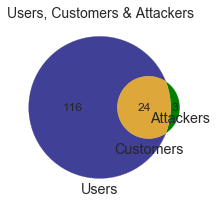

In [95]:
fig = plt.figure(figsize=(4,3))
fig.suptitle('Users, Customers & Attackers', fontsize=14)

ax = plt.subplot2grid((1,1), (0,0))

venn=venn3(ax=ax,subsets = {'001':len(attackers_set)-len(intersec_customers_attacker)-len(intersec_users_attackers)+len(intersec_users_customers_attackers), 
                            '010':len(customers_set)-len(intersec_users_customers)-len(intersec_customers_attacker)+len(intersec_users_customers_attackers), 
                            '011':len(intersec_customers_attacker)-len(intersec_users_customers_attackers),
                            '100':len(users_set)-len(intersec_users_customers)-len(intersec_users_attackers)+len(intersec_users_customers_attackers),
                            '101':len(intersec_users_attackers)-len(intersec_users_customers_attackers),
                            '110':len(intersec_users_customers)-len(intersec_users_customers_attackers),
                            '111':len(intersec_users_customers_attackers)},\
          set_labels = ('Users', 'Customers','Attackers'),\
          alpha=1)
try:
    venn.get_patch_by_id('100').set_color('#404096')
except:
    print("*Users set is empty!")  
    
try:
    venn.get_patch_by_id('110').set_color('#DEA73A')
except:
    print("*Customers set is empty!")   

try:
    venn.get_patch_by_id('001').set_color('#D92120')
except:
    print("*Attackers set is empty!")

fig.show()
# fig.savefig('../figs/timeseries_attacks.eps', format='eps', dpi=1200) 

## A.3. Distribution of login times per user

In [101]:
if len(df_logins['userid'].value_counts()) > 0:
    num_distinct_logins_per_user=df_logins['userid'].value_counts()
else:
    num_distinct_logins_per_user=df_logins['username'].value_counts()

freq_distinct_logins_per_user=num_distinct_logins_per_user.value_counts()
cum_dist_user_logins = np.linspace(0.,1.,len(num_distinct_logins_per_user))
cdf_user_logins = pd.Series(cum_dist_user_logins, index=num_distinct_logins_per_user.sort_values())

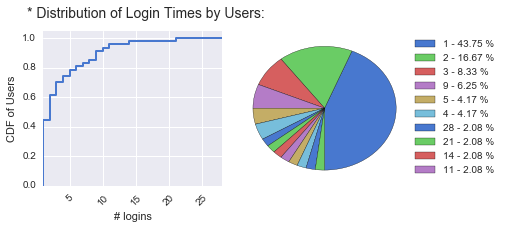

In [102]:
if len(num_distinct_logins_per_user)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Distribution of Login Times by Users:', fontsize=14, y=1.05,x=0.35)
    
    #Plot CDF
    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1 = cdf_user_logins.plot(ax=ax1,lw=2, drawstyle='steps',legend=False)
    ax1.set_xlabel("# logins")
    ax1.set_ylabel("CDF of Users")
    ax1.set_ylim(0,1.05)
    ax1.set_title("")
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    
    ax2 = plt.subplot2grid((1,2), (0,1))
    freq_distinct_logins_per_user.plot(ax=ax2,kind='pie', 
                                       labels=None, 
                                       legend=False,
                                       startangle=270,
#                                        colors=sns.color_palette()
                                       )
    ax2.set_ylabel("")
    
    
    
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*freq_distinct_logins_per_user.values)/(freq_distinct_logins_per_user.values.sum())
    labels = ['{0} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(freq_distinct_logins_per_user.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.5, 1.),
               fontsize=10)
    ####
    
    fig.tight_layout()
    fig.show()
    fig.savefig('figs/login_times.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")


## 5.3. Number of Users that Login via TOR

In [ ]:
len(df_logins_torcheck[df_logins_torcheck['tor']==True]['userip'].value_counts())

## 5.4. Number of Distinct IP addresses by Users

In [ ]:
if len(df_logins.groupby(['userid','userip']).size().reset_index()['userid'].value_counts()) >0:
    num_distinct_ips_per_user=df_logins.groupby(['userid','userip']).size().reset_index()['userid'].value_counts()
else:
    num_distinct_ips_per_user=df_logins.groupby(['username','userip']).size().reset_index()['username'].value_counts()
    
freq_distinct_ips_per_user=num_distinct_ips_per_user.value_counts()
cum_dist_user_ips = np.linspace(0.,1.,len(num_distinct_ips_per_user))
cdf_user_ips = pd.Series(cum_dist_user_ips, index=num_distinct_ips_per_user.sort_values())

In [ ]:
if len(num_distinct_ips_per_user)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Distribution of Distinct IP address used by Users:', fontsize=14, y=1.05, x=0.4)

    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1 = cdf_user_ips.plot( ax=ax1,lw=2, drawstyle='steps',legend=False)
    ax1.set_xlabel("# IPs")
    ax1.set_ylabel("CDF of Users")
    ax1.set_ylim(0,1.05)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    ax2 = plt.subplot2grid((1,2), (0,1))
    freq_distinct_ips_per_user.plot(ax=ax2,kind='pie',
                                    labels=None,legend=False,
                                       startangle=270,
#                                        colors=sns.color_palette()
                                       )
    ax2.set_ylabel("")
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*freq_distinct_ips_per_user.values)/(freq_distinct_ips_per_user.values.sum())
    labels = ['{0} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(freq_distinct_ips_per_user.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.5, 1.),
               fontsize=10)
    ####
    
    fig.tight_layout()
    fig.show()
    fig.savefig('figs/num_ips_by_users.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")


## 5.5. Number of Payments by Users

In [ ]:
if len(df_payments['userid'].value_counts())>0:
    num_distinct_payments_per_user=df_payments['userid'].value_counts()
else:
    num_distinct_payments_per_user=df_payments['username'].value_counts()

freq_distinct_payments_per_user=num_distinct_payments_per_user.value_counts()
cum_dist_user_payments = np.linspace(0.,1.,len(num_distinct_payments_per_user))
cdf_user_payments = pd.Series(cum_dist_user_payments, index=num_distinct_payments_per_user.sort_values())

In [ ]:
if len(num_distinct_payments_per_user)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Distribution of Number of Payments by Users:', fontsize=14, y=1.05, x=0.4)

    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1 = cdf_user_payments.plot( ax=ax1,lw=2, drawstyle='steps',legend=False)
    ax1.set_xlabel("# Payment")
    ax1.set_ylabel("CDF of Users")
    ax1.set_ylim(0,1.05)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
    
    ax2 = plt.subplot2grid((1,2), (0,1))
    freq_distinct_payments_per_user.plot(ax=ax2,kind='pie', 
                                         labels=None,legend=False,
                                         startangle=270)
    ax2.set_ylabel("")
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*freq_distinct_payments_per_user.values)/(freq_distinct_payments_per_user.values.sum())
    labels = ['{0} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(freq_distinct_payments_per_user.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.55, 1.),
               fontsize=10)
    ####
    fig.tight_layout()
    fig.show()
    fig.savefig('figs/payments_distribution.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")


## 5.6. Total Amount of Money Earned

In [ ]:
if len(df_payments['amountpaid']) >0:
    total_earned=df_payments['amountpaid'].values.sum()
    'US$ {:,.2f}'.format(float(total_earned))
else:
    print("Unfortunately, there is no data available!")

## 5.7. Amount of Money Paid by Users

In [ ]:
num_distinct_payments_money_per_user=df_payments['amountpaid'].value_counts()
freq_distinct_payments_money_per_user=num_distinct_payments_money_per_user.value_counts()
cum_dist_user_payments_money = np.linspace(0.,1.,len(num_distinct_payments_money_per_user))
cdf_user_payments_money = pd.Series(cum_dist_user_payments_money, index=num_distinct_payments_money_per_user.sort_values())

In [ ]:
if len(num_distinct_payments_money_per_user)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Distribution of Money Payments by Users:', fontsize=14, y=1.05, x=0.4)

    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1 = cdf_user_payments_money.plot( ax=ax1,lw=2, drawstyle='steps',legend=False)
    ax1.set_xlabel("$")
    ax1.set_ylabel("CDF of Users")
    ax1.set_ylim(0,1.05)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    ax2 = plt.subplot2grid((1,2), (0,1))
    freq_distinct_payments_money_per_user.plot(ax=ax2,kind='pie', 
                                               labels=None,legend=False,
                                               startangle=270)
    ax2.set_ylabel("")
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*freq_distinct_payments_money_per_user.values)/(freq_distinct_payments_money_per_user.values.sum())
    labels = ['${0:1.2f} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(freq_distinct_payments_money_per_user.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.6, 1.),
               fontsize=10)
    ####
    fig.tight_layout()
    fig.show()
    fig.savefig('figs/distribution_amount_paid.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")


## 5.8. Countries from where Users Access Booters

In [ ]:
logins_country_distribution_sorted = df_logins_iptoasn['country'].value_counts(sort=True,ascending=True)
logins_country_distribution = df_logins_iptoasn['country'].value_counts()

In [ ]:
if len(logins_country_distribution)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Users Accessing from Countries:', fontsize=14, y=1.05, x=0.28)

    ax1 = plt.subplot2grid((1,2), (0,0))
    logins_country_distribution_sorted.plot(ax=ax1,kind='barh')
    ax1.set_ylabel("# access")
    ax1.set_xlabel("Country")
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    ax2 = plt.subplot2grid((1,2), (0,1))
    logins_country_distribution.plot(ax=ax2,kind='pie', 
                                     labels=None,legend=False,
                                     startangle=270)
    ax2.set_ylabel("")
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*logins_country_distribution.values)/(logins_country_distribution.values.sum())
    labels = ['{0} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(logins_country_distribution.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.55, 1.),
               fontsize=10)
    ####
    fig.tight_layout()
    fig.show()
    fig.savefig('figs/user_countries.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")

## 5.9. Countries of Blacklisted IPs

In [ ]:
blacklist_country_distribution=df_blacklist_iptoasn['country'].value_counts()
blacklist_country_distribution_sorted=df_blacklist_iptoasn['country'].value_counts(sort=True,ascending=True)

In [ ]:
if len(blacklist_country_distribution)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Countries of blacklisted IPs', fontsize=14, y=1.05, x=0.28)

    ax1 = plt.subplot2grid((1,2), (0,0))
    blacklist_country_distribution_sorted.plot(ax=ax1,kind='barh')
    ax1.set_ylabel("# Access")
    ax1.set_xlabel("Country")
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    ax2 = plt.subplot2grid((1,2), (0,1))
    blacklist_country_distribution.plot(ax=ax2,kind='pie', 
                                        labels=None,legend=False,
                                        startangle=270)
    ax2.set_ylabel("")
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*blacklist_country_distribution.values)/(logins_country_distribution.values.sum())
    labels = ['{0} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(blacklist_country_distribution.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.55, 1.),
               fontsize=10)
    ####
    fig.tight_layout()
    fig.show()
    fig.savefig('figs/blacklist_countries.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")

## 5.10. Countries of Target IPs

In [ ]:
attacks_country_distribution=df_attacks_iptoasn['country'].value_counts()

In [ ]:
if len(attacks_country_distribution)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Countries of target IPs', fontsize=14, y=1.05, x=0.28)

    ax1 = plt.subplot2grid((1,2), (0,0))
    attacks_country_distribution.plot(ax=ax1,kind='bar')
    ax1.set_ylabel("# Access")
    ax1.set_xlabel("Country")
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    ax2 = plt.subplot2grid((1,2), (0,1))
    attacks_country_distribution.plot(ax=ax2,kind='pie', 
                                      labels=None,legend=False,
                                      startangle=270)
    ax2.set_ylabel("")
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*attacks_country_distribution.values)/(attacks_country_distribution.values.sum())
    labels = ['{0} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(attacks_country_distribution.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.55, 1.),
               fontsize=10)
    ####
    fig.tight_layout()
    fig.show()
    fig.savefig('figs/attack_countries_distribution.eps',bbox_inches='tight', format='eps', dpi=1200) 
else:
    print("Unfortunately, there is no data available!")

## 5.12. Attacks on Same Target

In [ ]:
num_attacks_on_sametarget=df_attacks['targetip'].value_counts()

freq_num_attacks_on_sametarget=num_attacks_on_sametarget.value_counts()
cum_num_attacks_on_sametarget = np.linspace(0.,1.,len(num_attacks_on_sametarget))
cdf_num_attacks_on_sametarget = pd.Series(cum_num_attacks_on_sametarget, index=num_attacks_on_sametarget.sort_values())

In [ ]:
if len(num_attacks_on_sametarget)>0:
    fig = plt.figure(figsize=(6, 3))
    fig.suptitle('* Attacks on Same Targets:', fontsize=14, y=1.05,x=0.28)

    ax1 = plt.subplot2grid((1,2), (0,0))
    ax1 = cdf_num_attacks_on_sametarget.plot( ax=ax1,lw=2, drawstyle='steps',legend=False)
    ax1.set_xlabel("# IPs")
    ax1.set_ylabel("CDF of Users")
    ax1.set_ylim(0,1.05)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)

    ax2 = plt.subplot2grid((1,2), (0,1))
    freq_num_attacks_on_sametarget.plot(ax=ax2,kind='pie',
                                        labels=None,legend=False,
                                        startangle=270)
    ax2.set_ylabel("")
    ####
    # For Pie Chart Better Legend box
    porcent = (100.*freq_num_attacks_on_sametarget.values)/(freq_num_attacks_on_sametarget.values.sum())
    labels = ['{0} - {1:1.2f} %'.\
              format(i,j) for i,j in zip(freq_num_attacks_on_sametarget.index, porcent)]
    # To Sort Legend (defaulf: keeps the same order)
#     patches, labels, dummy =  zip(*sorted(zip(patches, labels, freq_distinct_logins_per_user.values),
#                                           key=lambda x: x[2],
#                                           reverse=True))
    legend_show_top=10
    ax2.legend(ax2.patches[0:legend_show_top], 
               labels[0:legend_show_top], 
               bbox_to_anchor=(1.55, 1.),
               fontsize=10)
    ####
    fig.tight_layout()

    fig.show()
    fig.savefig('figs/attacks_on_same_target.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")

## 5.11. Attacks per day (timeseries) 

In [ ]:
if len(df_attacks)>0:
    attack_timeseries=df_attacks.set_index(['date']).groupby(pd.TimeGrouper(freq='D')).agg(['count'])['action']
    attack_mean_perday=attack_timeseries.mean()
    attack_median_perday=attack_timeseries.median()
else:
    attack_timeseries=""

In [ ]:
if len(attack_timeseries)>0:
    fig = plt.figure(figsize=(6,3))

    ax1 = plt.subplot2grid((1,1), (0,0), rowspan=2)
    attack_timeseries.plot(ax=ax1,
                           lw=2,
                           legend=False,
    #                        style='--'
                          )

    # X and Y Labels and Ticks
    ax1.set_xlabel("Time (bin=day)")
    ax1.set_ylabel("# Attacks")

    ax1.annotate(str(int(attack_median_perday[0]))+' (median)', 
                 (min(df_attacks['date']), attack_median_perday),
                 xytext=(350, -1), 
                 textcoords='offset points',
                 color='black', 
                 arrowprops=dict(arrowstyle='-|>',
                                 color='black'))
    fig.savefig('figs/attacks_timeseries.eps', bbox_inches='tight',format='eps', dpi=1200)

else:
    print("Unfortunately, there is no data available!")

## 5.12. Time Between Logins and Attacks

In [ ]:
if len(df_attacks_and_logins)>0:
    print("redo")
else:
    print("Unfortunately, there is no data available!")

## 5.13. Who attack whom? (users on the country level)

In [ ]:
if len(df_attacks_extended)>0 and len(df_logins_extended)>0:
    merged_attacks_logins = pd.merge(df_attacks_extended,
                                  df_logins_extended,
                                  how = 'left',
                                  left_on = 'date',
                                  right_on = 'date')[['targetcountry','srccountry']]

    who_against_whom = merged_attacks_logins.groupby(['targetcountry','srccountry'])\
                            .size()\
                            .reset_index()\
                            .pivot('srccountry','targetcountry',0)
else:
    who_against_whom =""

In [ ]:
if len(who_against_whom)>0:
    fig = plt.figure(figsize=(8,12))
    fig.suptitle('Countries of Target IPs', fontsize=14, y=.92)

    ax1 = plt.subplot2grid((1,1), (0,0))
    sns.set()
    sns.heatmap(who_against_whom,
                ax=ax1,
#                 cmap="YlGnBu",
    #             linewidths=.5,
    #             annot=True
                )

    ax1.set_ylabel("Source Country")
    ax1.set_xlabel("Attack Target Country")

    fig.show()
    fig.savefig('figs/who_attack_whom.eps', bbox_inches='tight',format='eps', dpi=1200)
else:
    print("Unfortunately, there is no data available!")

<h1 align="center">!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!<br>
FIFTH PART: Query Interface<br>
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!</h1> 

In [ ]:
from ipywidgets import widgets, interact, Dropdown,HTML
from IPython.display import display,clear_output

In [ ]:
def search_by_userid_submit(sender):
    clear_output()
    print("Searching by id =",search_by_userid.value)
    
    if len(df_users[df_users['userid']== int(search_by_userid.value)])>0:
        display(df_users[df_logins['userid']== int(search_by_userid.value)])
    
    if len(df_logins_extended[df_logins_extended['userid']== int(search_by_userid.value)])>0:
        display(df_logins_extended[df_logins_extended['userid']== int(search_by_userid.value)])
    
    if len(df_attacks_extended[df_attacks_extended['userid']== int(search_by_userid.value)])>0:
        display(df_attacks_extended[df_attacks_extended['userid']== int(search_by_userid.value)])
    
    if len(df_payments[df_payments['userid']== int(search_by_userid.value)])>0:
        display(df_payments[df_payments['userid']== int(search_by_userid.value)])

def search_by_username_submit(sender):
    clear_output()
    print("Searching by username =",search_by_username.value,"\n")
    
    if len(df_users[df_users['username']== search_by_username.value])>0:
        print("Table df_users:")
        display(df_users[df_users['username']== search_by_username.value])
    
    if len(df_logins_extended[df_logins_extended['username']== search_by_username.value])>0:
        print("Table df_logins:")
        display(df_logins_extended[df_logins_extended['username']== search_by_username.value])

    if len(df_attacks_extended[df_attacks_extended['username']== search_by_username.value])>0:
        print("Table df_attacks:")
        display(df_attacks_extended[df_attacks_extended['username']== search_by_username.value])
    
    if len(df_payments[df_payments['username']== search_by_username.value])>0:
        print("Table df_payments:")
        display(df_payments[df_payments['username']== search_by_username.value])
        
def search_by_ip_submit(sender):
    clear_output()
    print("Searching by IP address =",str(search_by_ip.value),"\n")
    
    if len(df_logins_extended[df_logins_extended['userip']== str(search_by_ip.value)])>0:
        print("Table df_logins (as ATTACKER:")
        display(df_logins_extended[df_logins_extended['userip']== str(search_by_ip.value)])
     
    if len(df_attacks_extended[df_attacks_extended['targetip']== str(search_by_ip.value)])>0:
        print("Table df_attacks (as TARGET):")
        display(df_attacks_extended[df_attacks_extended['targetip']== str(search_by_ip.value)])  
      
       
def search_by_asn_submit(sender):
    clear_output()
    print("Searching by Autonomous System Number (ASN) =",search_by_asn.value,"\n")
    
    if len(df_logins_extended[df_logins_extended['srcasn']== int(search_by_asn.value)])>0:
        print("Table df_logins (as ATTACKER):")
        display(df_logins_extended[df_logins_extended['srcasn']== int(search_by_asn.value)])
    
    if len(df_attacks_extended[df_attacks_extended['targetasn']== str(search_by_asn.value)])>0:
        print("Table df_attacks (as TARGET):")
        display(df_attacks_extended[df_attacks_extended['targetasn']== str(search_by_asn.value)])

    if len(df_attacks_extended[df_attacks_extended['targetasn']== str(search_by_asn.value)])>0:
        print("Table df_attacks (as TARGET):")
        display(df_attacks_extended[df_attacks_extended['targetasn']== str(search_by_asn.value)])

        
country_list=pd.read_csv('https://raw.githubusercontent.com/datasets/country-list/master/data.csv',delimiter=",",error_bad_lines=False)
def search_by_country_submit():
    country_code=country_list[country_list['Name']==search_by_country.value]['Code'].values[0]
    clear_output()
    print("Searching by Country =",search_by_country.value,"\n")
    
    if len(df_logins_extended[df_logins_extended['srccountry']== country_code])>0:
        print("Table df_logins (as ATTACKER):")
        display(df_logins_extended[df_logins_extended['srccountry']== country_code])
    
    if len(df_attacks_extended[df_attacks_extended['targetcountry']== country_code])>0:
        print("Table df_attacks (as TARGET):")
        display(df_attacks_extended[df_attacks_extended['targetcountry']== country_code])
    

In [ ]:
display(HTML('<h3>*Search by (only) one field per time:</h3>'))

search_by_username = widgets.Text(description="username")
display(search_by_username)
search_by_username.on_submit(search_by_username_submit)

search_by_userid = widgets.Text(description="userid")
display(search_by_userid)
search_by_userid.on_submit(search_by_userid_submit)

search_by_ip = widgets.Text(description="IP")
display(search_by_ip)
search_by_ip.on_submit(search_by_ip_submit)

search_by_asn = widgets.Text(description="ASN")
display(search_by_asn)
search_by_asn.on_submit(search_by_asn_submit)

search_by_country = Dropdown(description="Country", options=country_list['Name'].tolist())
search_by_country.on_trait_change(search_by_country_submit, name="value")
display(search_by_country)